In [1]:
import numpy as np
from numpy import *
from pylab import *
from math import *
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os 
import pandas as pd
import glob
from astropy.io import ascii
import itertools
from datetime import datetime

# Ajuste gaussiano
from scipy.optimize import minimize
import emcee
import corner
from IPython.display import display, Math
from scipy.optimize import curve_fit

path = os.getcwd()

### Sustracción del espectro de los gases

Una vez se obtiene el espectro sintetizado mediante Starlight se procede a obtener el espectro del gas.

El espectro sintetizado por el código de Starlight se corresponde con la parte estelar, por lo que al eliminarla obtenemos los gases.

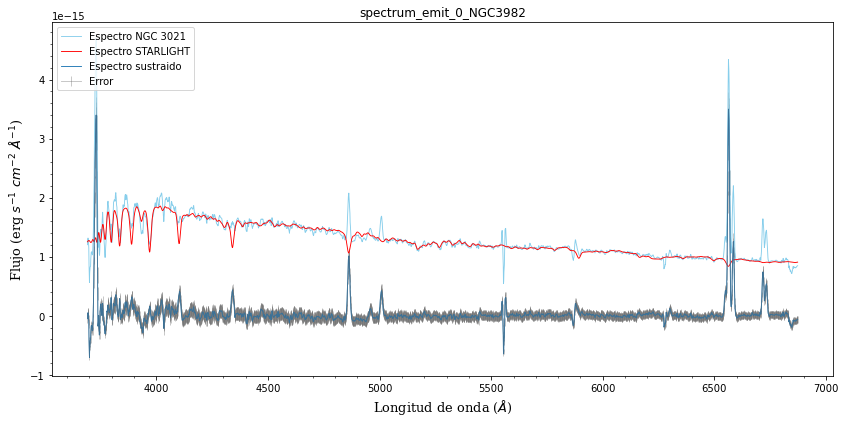

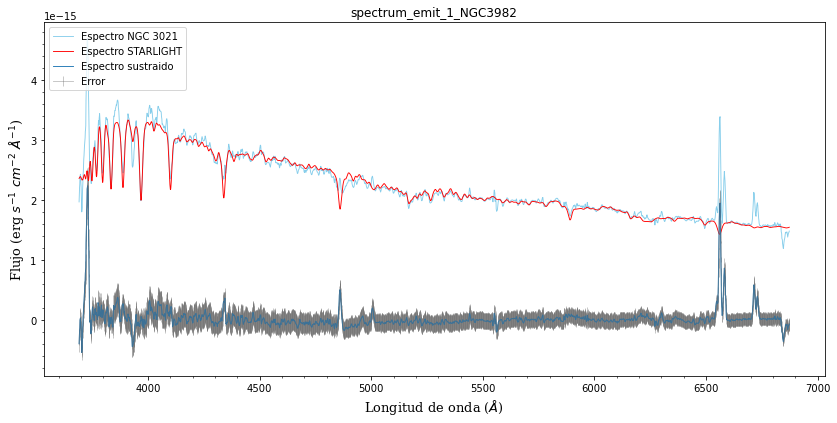

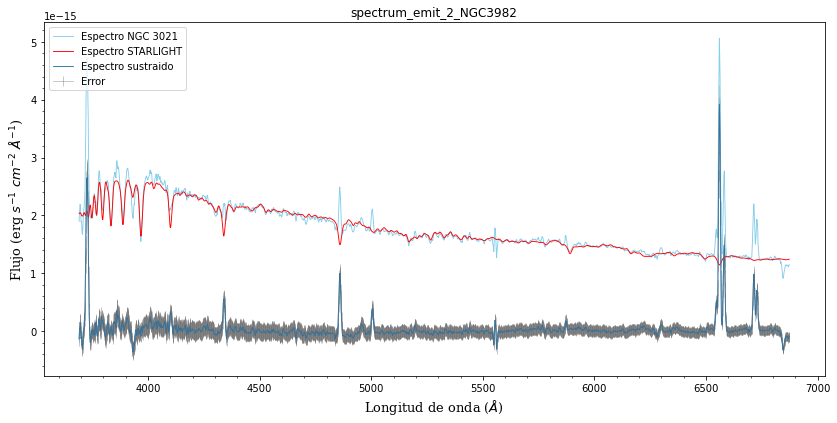

In [2]:
os.chdir(path+'\emited_spectrum')    
os.getcwd()

l_obs_todos = []
f_obs_todos = []
f_syn_todos = []
e_emit_todos = []

lenn = len(glob.glob1(path+'\emited_spectrum',"*.BN"))
#for i in list(itertools.chain(range(lenn-10,lenn-9))):
for i in range(len(glob.glob1(path+'/emited_spectrum',"*.BN"))):
    file = 'spectrum_emit_'+str(i)+'_NGC3982'
    l_obs = []
    f_obs = []
    f_syn = []
    with open(file+'.BN', 'r') as SL:
        f_obs_norm = float((np.array((SL.readlines()[25]).split()))[0,])
    with open(file+'.BN', 'r') as SL:
        data = SL.readlines()[1078:4334]   
        for linea in data:
            linea = np.array(linea.split())
            if float(linea[1]) != 0:
                l_obs.append(float(linea[0,]))
                f_obs.append(float(linea[1,]))
                f_syn.append(float(linea[2,]))
        l_obs = np.array(l_obs)
        f_obs = np.array(f_obs)*f_obs_norm
        f_syn = np.array(f_syn)*f_obs_norm
    
    e_emit = []
    with open(file+'.txt','r') as datos:
        data = datos.readlines()
        for linea in data:
            linea = np.array(linea.split())
            if float(linea[0]) >= l_obs[0] and float(linea[0]) <= l_obs[-1]:
                e_emit.append(float(linea[2,]))
        e_emit = np.array(e_emit)        
        
    
    fig, ax = plt.subplots(figsize=(14,6.5))
    ax.plot(l_obs,f_obs,color='skyblue', linewidth=0.9,label="Espectro NGC 3021")
    ax.plot(l_obs,f_syn,color='red', linewidth=0.9,label="Espectro STARLIGHT")
    ax.errorbar(l_obs,f_obs-f_syn,yerr=e_emit,linewidth=0.9, alpha=0.4, label='Error', color='dimgrey')
    ax.plot(l_obs,f_obs-f_syn, linewidth=0.9,label="Espectro sustraido")
    
    xlabel(r'Longitud de onda ($\AA$)', fontsize=13,fontfamily='serif'); ylabel(r'Flujo (erg $s^{-1}$ $cm^{-2}$ $\AA^{-1}$)', fontsize=13,fontfamily='serif') 
    plt.legend(loc='upper left')
    title('%s' %(file));plt.legend(loc='upper left')
    plt.minorticks_on()
    #axvline(4861, color='k', ls="dotted",lw='0.9')
    #text(4881, 8.3*10**(-16), r'[H$_{\beta}$] 4861',alpha=0.8,rotation='vertical',fontsize='11') 
    #axvline(5007, color='k', ls="dotted",lw='0.9')
    #text(5027, 8.3*10**(-16), r'[O III] 5007',alpha=0.8,rotation='vertical',fontsize='11') 
    #axvline(6563, color='k', ls="dotted",lw='0.9')
    #text(6485, 9.9*10**(-16), r'[H$_{\alpha}$] 6563',alpha=0.8,rotation='vertical',fontsize='11') 
    #axvline(6583, color='k', ls="dotted",lw='0.9')
    #text(6603, 9.9*10**(-16), r'[N II] 6583',alpha=0.8,rotation='vertical',fontsize='11') 
    #axvline(6716, color='k', ls="dotted",lw='0.9')
    #text(6646, 6.5*10**(-16), r'[S II] 6716',alpha=0.8,rotation='vertical',fontsize='11') 
    #axvline(6731, color='k', ls="dotted",lw='0.9')
    #text(6751, 6.5*10**(-16), r'[S II] 6731',alpha=0.8,rotation='vertical',fontsize='11')  
    #plt.savefig('espectro_final.png')
    plt.show() 
    
    l_obs_todos.append(l_obs)
    f_obs_todos.append(f_obs)
    f_syn_todos.append(f_syn)
    e_emit_todos.append(e_emit)
    
l_obs_todos = np.array(l_obs_todos)
f_obs_todos = np.array(f_obs_todos)
f_syn_todos = np.array(f_syn_todos)
e_emit_todos = np.array(e_emit_todos)

### Ajuste gaussiano en las líneas de Hbeta, OIII, Halfa y NII

Se emplean dos ajustes distintos:
 - Dos ajustes simple para Hb y OIII 
         def gaussian(x, a, x0, sigma):
            return a*np.exp(-(x-x0)**2/(2*sigma**2))
            
 - Un ajuste triple para Halfa y NII 
         def gaussian_2(x, a1 ,a2,a3, x0, sigma):
           return a1*np.exp(-(x-x0)**2/(2*sigma**2))+a2*np.exp(-(x-(x0+d1))**2/(2*sigma**2))+a3*np.exp(-(x-(x0-d2))**2/(2*sigma**2))
        
   
Como las líneas de Halfa y NII están muy cerca hay que hacer un ajuste de tres gaussianas a la vez. 


AJUSTANDO ESPECTRO 0

Ajuste en 4861 nm:

Parámetros reales:
1.0 0.0 2.0



C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


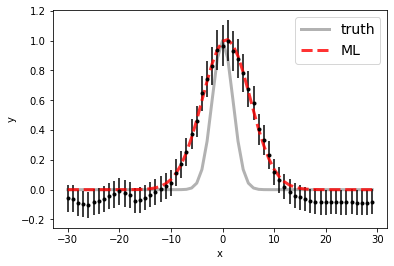

100%|██████████| 15000/15000 [00:14<00:00, 1045.85it/s]


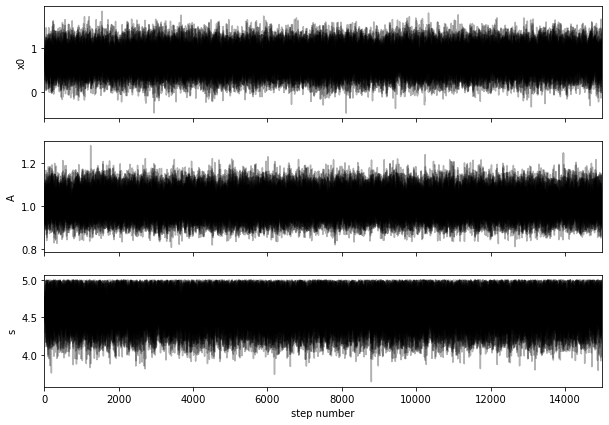

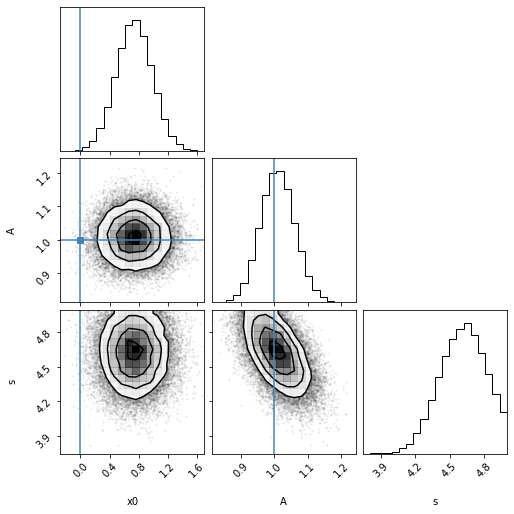

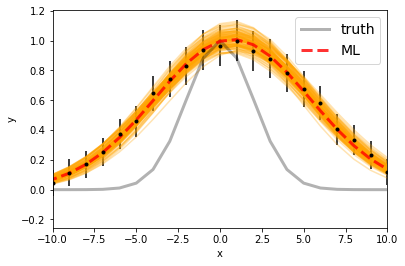

Maximum likelihood estimates:
x0 = 0.740
A = 1.008
s = 4.632


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Parámetros obtenidos:
x0 =  4861.738016828014 [0.24907357 0.2500584 ]
A  =  1.0211140984833788e-15 [5.11382974e-17 5.25698344e-17]
s  =  4.620553291681203 [0.21091787 0.19683509]

-------------------------------------------------------------------------------------------

Ajuste en 5007 nm:

Parámetros reales:
1.0 0.0 2.0



C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


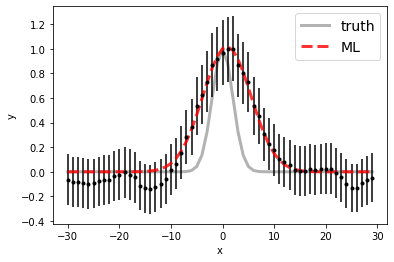

100%|██████████| 15000/15000 [00:14<00:00, 1061.38it/s]


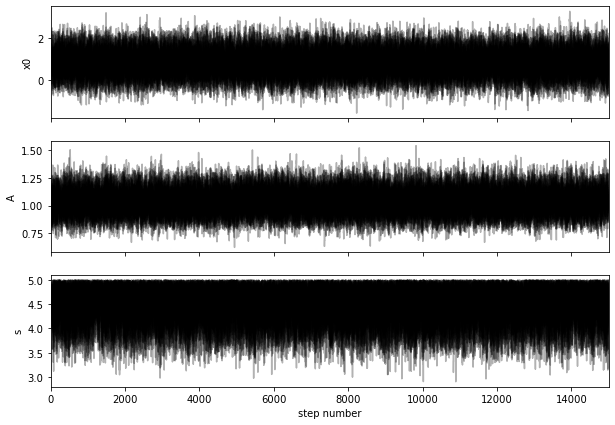

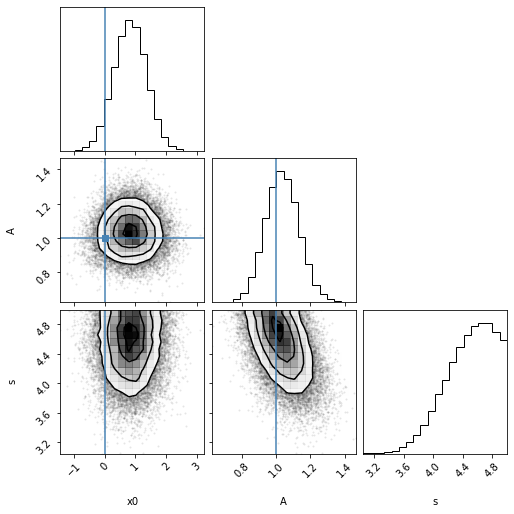

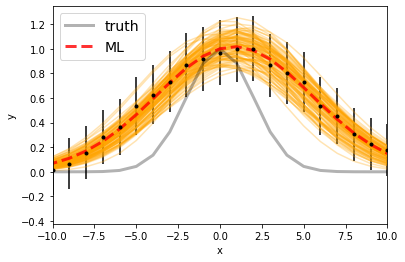

Maximum likelihood estimates:
x0 = 0.849
A = 1.018
s = 4.670


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Parámetros obtenidos:
x0 =  5007.832737904686 [0.54192352 0.52487637]
A  =  4.375738419584123e-16 [4.08268224e-17 4.24623527e-17]
s  =  4.533907830464136 [0.3867799  0.30481003]

-------------------------------------------------------------------------------------------

Ajuste en 6563 nm:

Parámetros reales:
1.0 1.0 1.0 0.0 2.0



C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


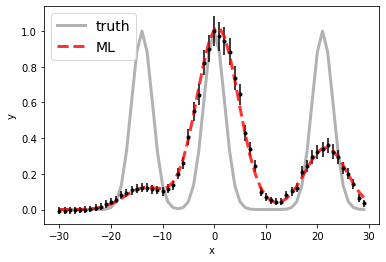

100%|██████████| 15000/15000 [00:22<00:00, 654.36it/s]


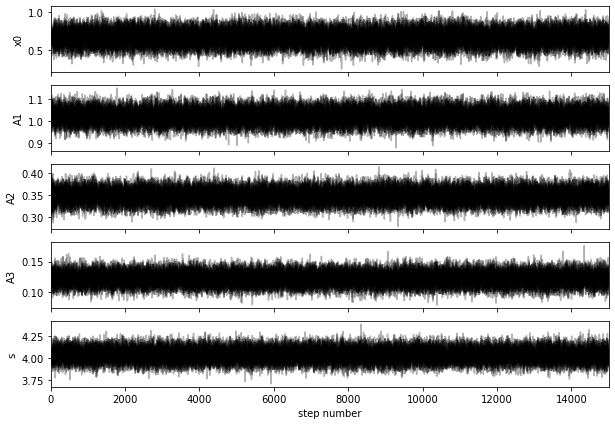

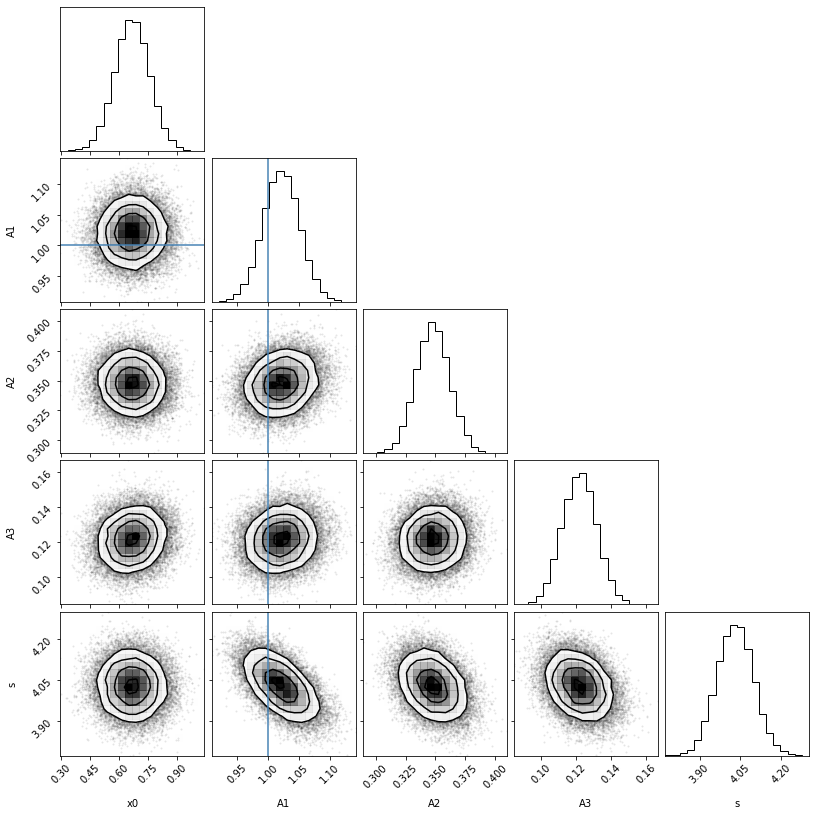

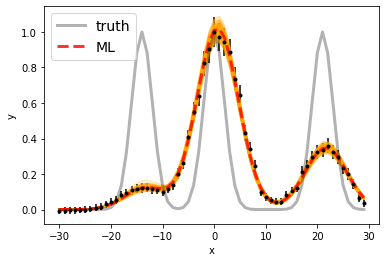

Maximum likelihood estimates:
x0 = 0.667
A1 = 1.022
A2 = 0.348
A3 = 0.122
s = 4.030


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Parámetros obtenidos:
x01, x02 =  6563.666948581398 6584.666948581398 [0.08849534 0.08994611]
A1, A2   =  3.572652170712246e-15 1.2165120108123853e-15 [1.03363572e-16 1.04289259e-16] [4.83667583e-17 4.94643937e-17]
s  =  4.030379169239395 [0.06636012 0.06618468]

-------------------------------------------------------------------------------------------

///////////////////////////////////////////////////////////////////////////////////////////


AJUSTANDO ESPECTRO 1

Ajuste en 4861 nm:

Parámetros reales:
1.0 0.0 2.0



C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


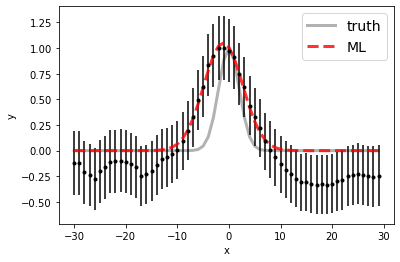

100%|██████████| 15000/15000 [00:14<00:00, 1038.34it/s]


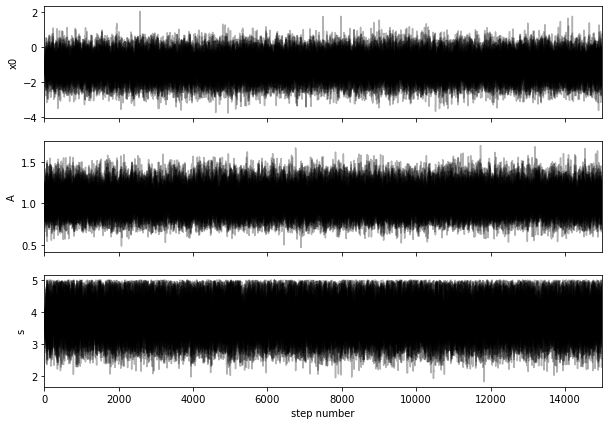

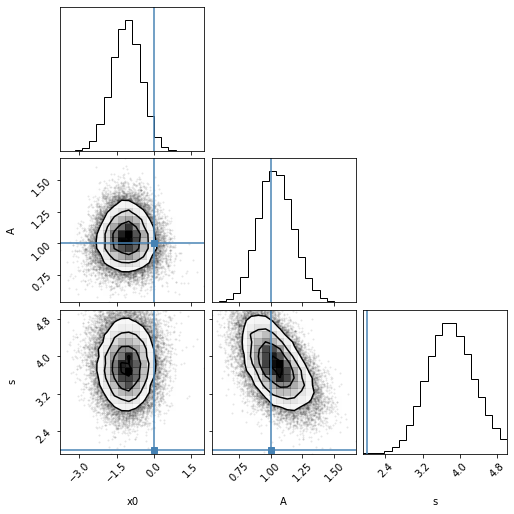

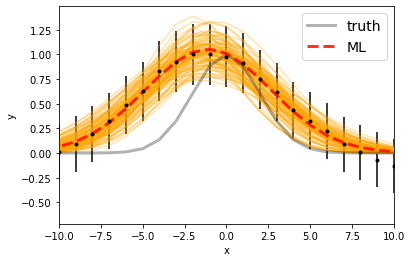

Maximum likelihood estimates:
x0 = -1.094
A = 1.052
s = 3.767


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Parámetros obtenidos:
x0 =  4859.902966764348 [0.59000489 0.58458121]
A  =  5.27081406986026e-16 [6.79193863e-17 7.26080244e-17]
s  =  3.78866480555593 [0.48495008 0.51357434]

-------------------------------------------------------------------------------------------

Ajuste en 5007 nm:

Parámetros reales:
1.0 0.0 2.0



C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


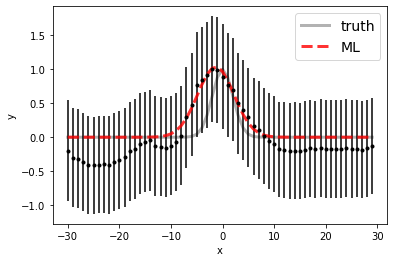

100%|██████████| 15000/15000 [00:13<00:00, 1092.39it/s]


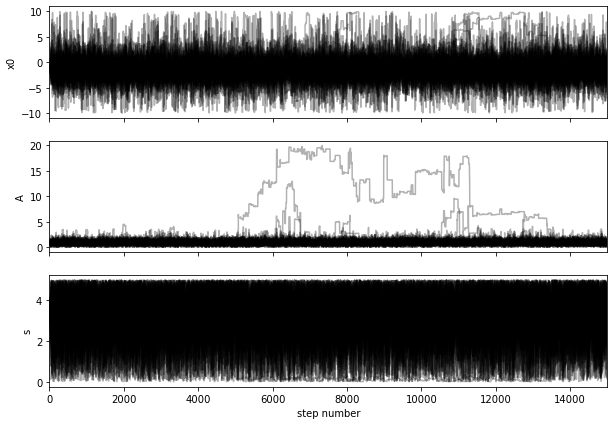

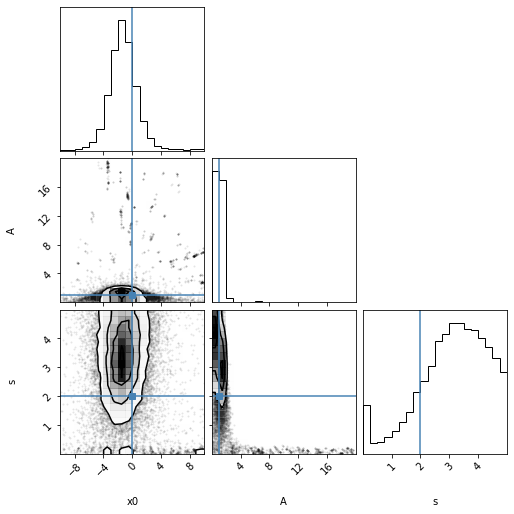

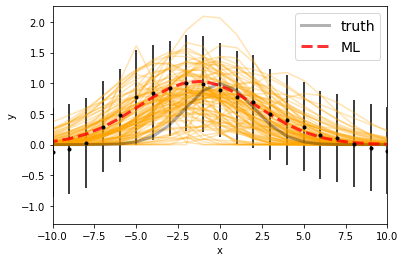

Maximum likelihood estimates:
x0 = -1.315
A = 1.036
s = 3.524


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Parámetros obtenidos:
x0 =  5005.669970831989 [1.72202776 1.81587415]
A  =  2.0470675585863947e-16 [7.38987398e-17 8.61588104e-17]
s  =  3.2618024392806095 [1.24941387 1.06832698]

-------------------------------------------------------------------------------------------

Ajuste en 6563 nm:

Parámetros reales:
1.0 1.0 1.0 0.0 2.0



C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


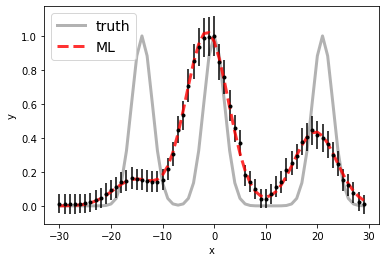

100%|██████████| 15000/15000 [00:22<00:00, 654.13it/s]


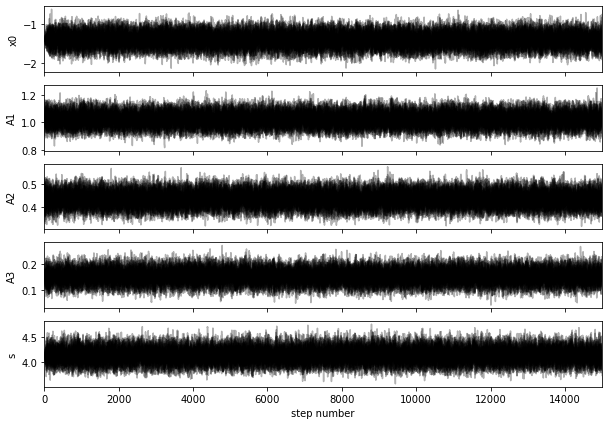

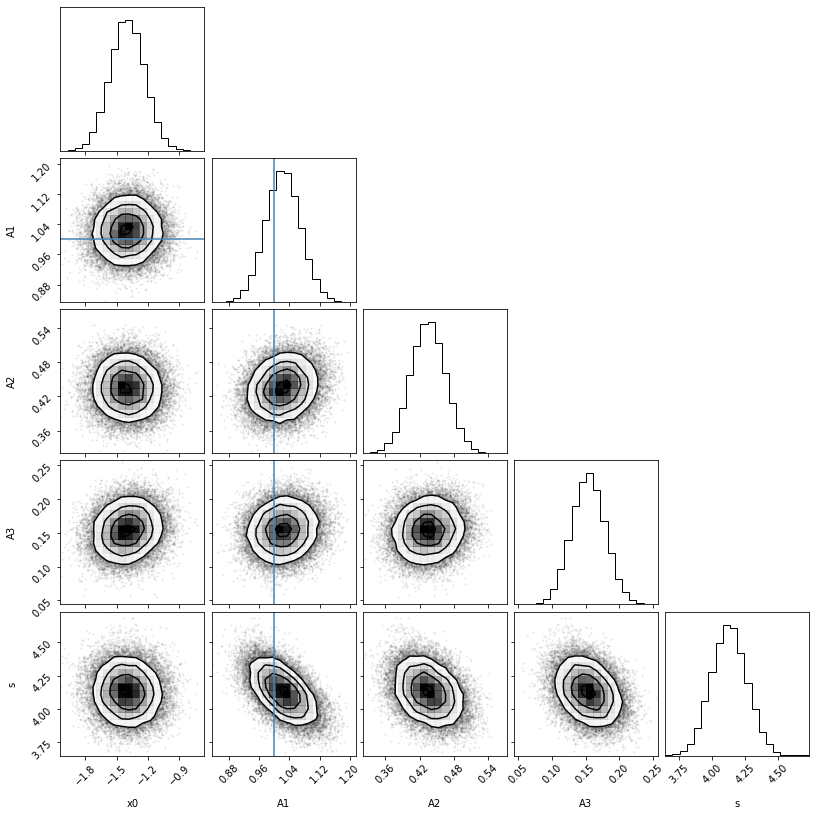

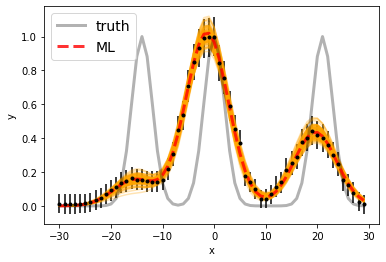

Maximum likelihood estimates:
x0 = -1.398
A1 = 1.024
A2 = 0.435
A3 = 0.155
s = 4.126


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Parámetros obtenidos:
x01, x02 =  6561.601320128574 6582.601320128574 [0.16437295 0.16543489]
A1, A2   =  1.9984936524368363e-15 8.503284363963983e-16 [9.00599501e-17 8.90978456e-17] [5.91646359e-17 5.99371648e-17]
s  =  4.127773425563127 [0.13358055 0.13486458]

-------------------------------------------------------------------------------------------

///////////////////////////////////////////////////////////////////////////////////////////


AJUSTANDO ESPECTRO 2

Ajuste en 4861 nm:

Parámetros reales:
1.0 0.0 2.0



C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


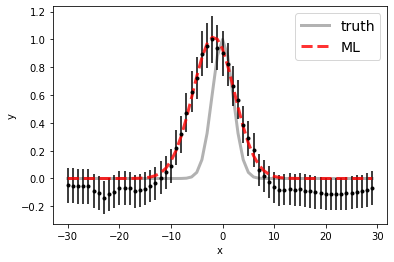

100%|██████████| 15000/15000 [00:14<00:00, 1003.90it/s]


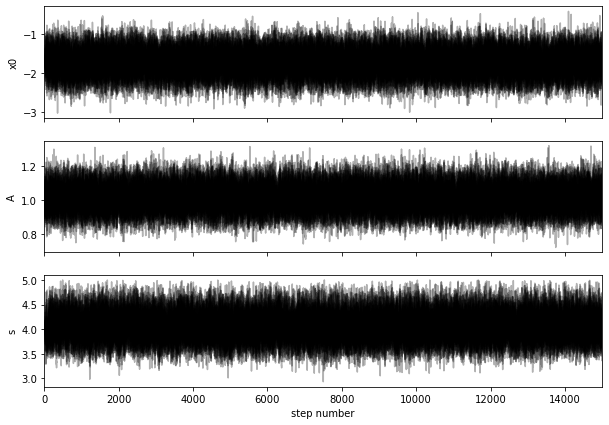

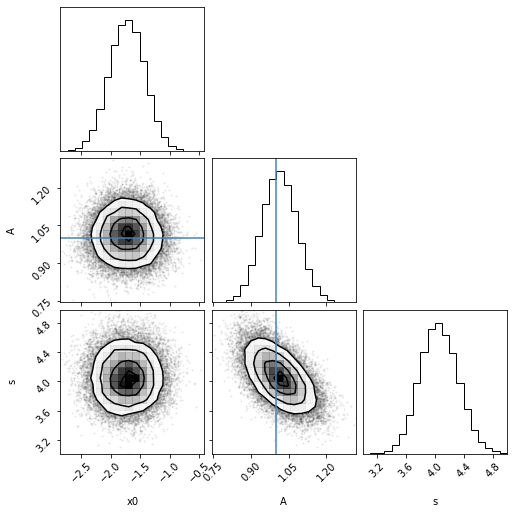

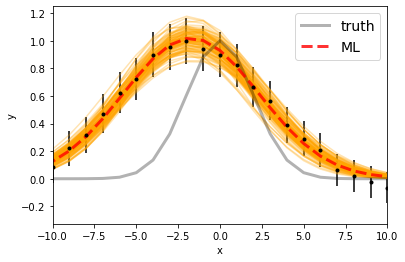

Maximum likelihood estimates:
x0 = -1.728
A = 1.018
s = 4.045


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Parámetros obtenidos:
x0 =  4859.27618532652 [0.29874396 0.29713785]
A  =  1.0067659946831445e-15 [6.85523448e-17 7.01773447e-17]
s  =  4.0520206543853625 [0.25181704 0.26489601]

-------------------------------------------------------------------------------------------

Ajuste en 5007 nm:

Parámetros reales:
1.0 0.0 2.0



C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


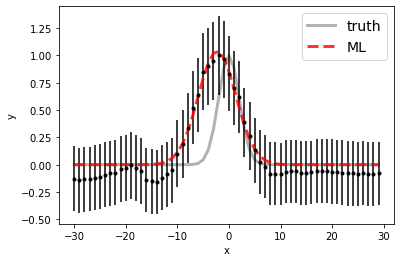

100%|██████████| 15000/15000 [00:14<00:00, 1017.46it/s]


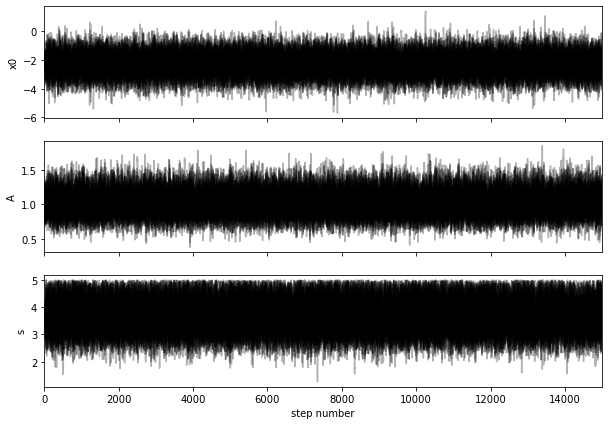

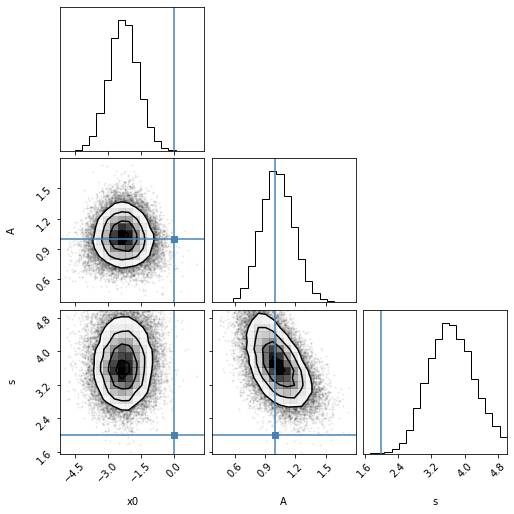

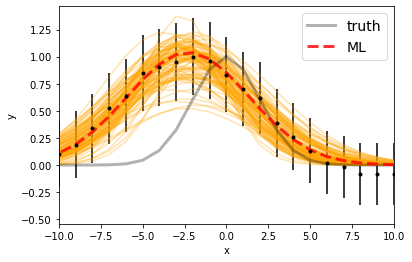

Maximum likelihood estimates:
x0 = -2.283
A = 1.039
s = 3.648


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Parámetros obtenidos:
x0 =  5004.71202631 [0.65955863 0.65572852]
A  =  4.001065739916819e-16 [6.07321444e-17 6.43500461e-17]
s  =  3.665060949472304 [0.53276614 0.57327156]

-------------------------------------------------------------------------------------------

Ajuste en 6563 nm:

Parámetros reales:
1.0 1.0 1.0 0.0 2.0



C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


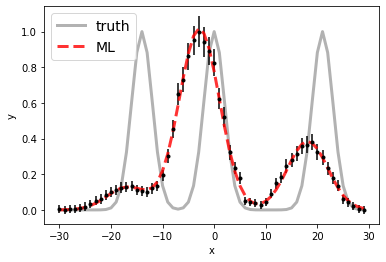

100%|██████████| 15000/15000 [00:22<00:00, 661.62it/s]


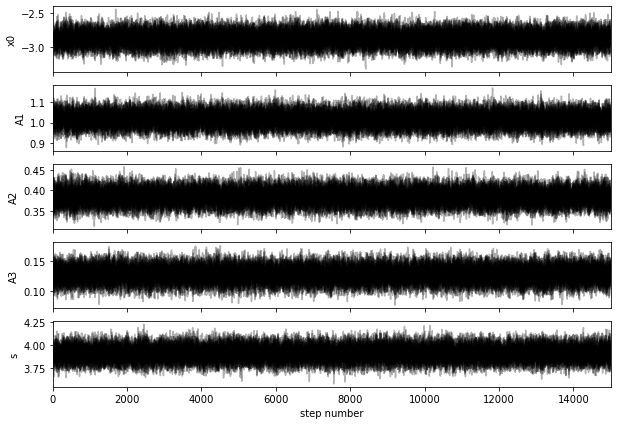

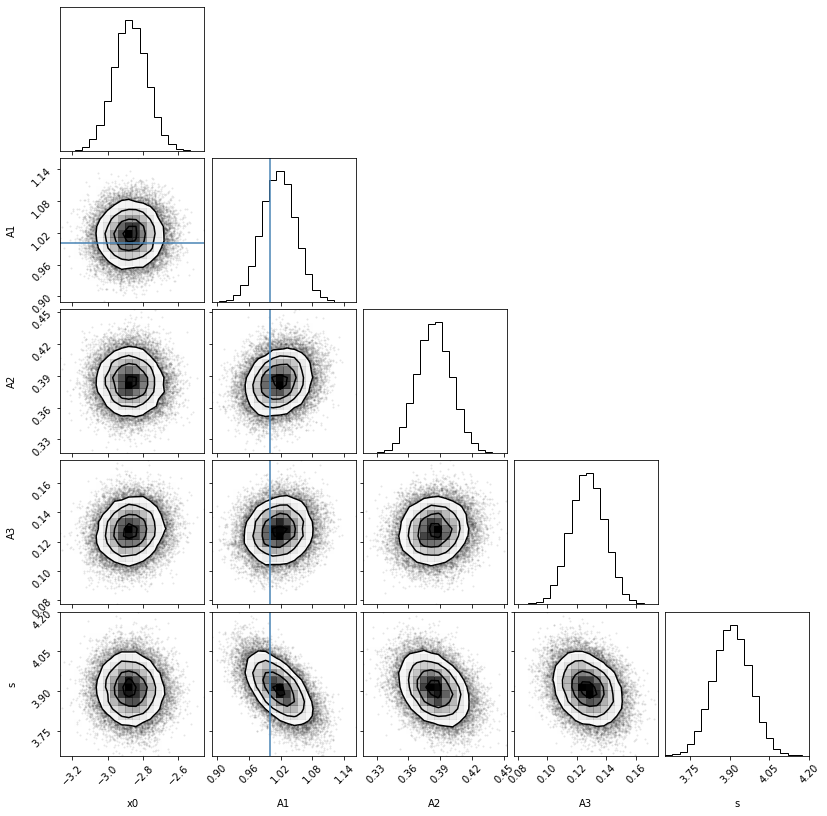

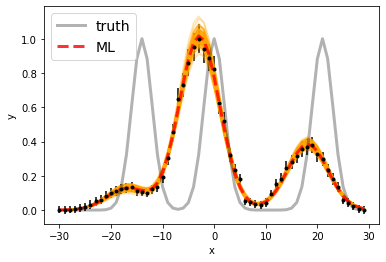

Maximum likelihood estimates:
x0 = -2.872
A1 = 1.016
A2 = 0.384
A3 = 0.127
s = 3.909


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Parámetros obtenidos:
x01, x02 =  6560.127701211846 6581.127701211846 [0.09288462 0.09399534]
A1, A2   =  3.977382729904485e-15 1.5047831425325393e-15 [1.24181882e-16 1.25470683e-16] [6.39983915e-17 6.41416404e-17]
s  =  3.907195670232661 [0.06949655 0.07020085]

-------------------------------------------------------------------------------------------

///////////////////////////////////////////////////////////////////////////////////////////


El programa ha finalizado en 176 s.


In [3]:
instanteInicial = datetime.now()

os.chdir(path+'\\adjusted_spectrum')    
os.getcwd()


Hbeta = 4861
OIII = 5007
Halfa = 6563
NII = 6583

lineas = np.array([Hbeta,OIII,Halfa,NII])
lineas_wave = np.array(np.where((l_obs==Hbeta)|(l_obs==OIII)|(l_obs==Halfa)|(l_obs==NII)))

for j in range(len(l_obs_todos[:,0])):
    l_obs = l_obs_todos[j,:]
    f_obs = f_obs_todos[j,:]
    f_syn = f_syn_todos[j,:]
    e_emit = e_emit_todos[j,:]
    
    print('AJUSTANDO ESPECTRO',j)
    print()
    
    
    ##################################### Hb y OIII
    x0_1 = []
    A_1 = []
    s_1 = []
    e_x0_1 = []
    e_A_1 = []
    e_s_1 = []
    lineas_1 = lineas[0:2]
    lineas_wave_1 = lineas_wave[0,0:2]
    for i in range(len(lineas_1)):
        lim_i=lineas_wave_1[i]-30; lim_i=int(lim_i)
        lim_f=lineas_wave_1[i]+30; lim_f=int(lim_f)
        
        # Choose the "true" parameters.
        data = f_obs-f_syn
        wave = l_obs[lim_i:lim_f]
        flux = data[lim_i:lim_f]
        ymax = np.max(flux)
        x = wave-lineas_1[i]
        y = flux/ymax
        yerr = e_emit[lim_i:lim_f]/ymax
        linea = lineas_1[i]
        
        def gaussian(x, a, x0, sigma):
            return a*np.exp(-(x-x0)**2/(2*sigma**2))
            
        popt, pcov = curve_fit(gaussian, wave, flux, p0=[1, 0, 2])
        
        A_true,x0_true,s_true=popt
        print('Ajuste en', lineas_1[i],'nm:')
        print()
        print('Parámetros reales:')
        print(A_true,x0_true,s_true)
        print()
        
        
        # Maximum likehood estimation:
        def log_likelihood(theta, x, y, yerr):
            x0, A, s = theta
            model = A * np.exp( -(x-x0)**2 / (2 * s**2) )
            sigma2 = yerr ** 2 #+ model ** 2 
            return -0.5 * np.sum((y - model) ** 2 / sigma2 )#+ np.log(sigma2))
        
        np.random.seed(42)
        nll = lambda *args: -log_likelihood(*args)
        initial = np.array([x0_true, A_true, s_true]) + 0.1 * np.random.randn(3)
        soln = minimize(nll, initial, args=(x, y, yerr))
        x0_ml, A_ml, s_ml = soln.x
        
        
        plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
        plt.plot(x, A_true * np.exp(-(x-x0_true)**2 / (2*s_true**2))  , "k", alpha=0.3, lw=3, label="truth")
        plt.plot(x, A_ml * np.exp(-(x-x0_ml)**2 / (2*s_ml**2))  , "--r", alpha=0.8, lw=3, label="ML")
        plt.legend(fontsize=14)
        #plt.xlim(-10, 10)
        plt.xlabel('x')
        plt.ylabel('y');
        plt.show()
        
        
        # Marginalization and uncertainty:
        def log_prior(theta):
            x0, A, s = theta
            if -10. < x0 < 10. and 0.0 < A < 20.0 and 0.0 < s < 5.0:
                return 0.0
            return -np.inf
        
        def log_probability(theta, x, y, yerr):
            lp = log_prior(theta)
            if not np.isfinite(lp):
                return -np.inf
            return lp + log_likelihood(theta, x, y, yerr)
        
        pos = soln.x + 1e-4 * np.random.randn(30, 3)
        nwalkers, ndim = pos.shape
        
        sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
        sampler.run_mcmc(pos, 15000, progress=True);
        
        
        fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
        samples = sampler.get_chain()
        labels = ["x0", "A", "s"]
        for i in range(ndim):
            ax = axes[i]
            ax.plot(samples[:, :, i], "k", alpha=0.3)
            ax.set_xlim(0, len(samples))
            ax.set_ylabel(labels[i])
        #    ax.yaxis.set_label_coords(-0.1, 0.5)
        
        axes[-1].set_xlabel("step number");
        plt.show()
        
        
        flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
        #print(flat_samples.shape)
        
        
        # Resultados
        fig = corner.corner(flat_samples, labels=labels, truths=[x0_true, A_true, s_true]);
        plt.show()
        
        inds = np.random.randint(len(flat_samples), size=100)
        plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
        for ind in inds:
            sample = flat_samples[ind]
            plt.plot(x, sample[1] * np.exp(-(x-sample[0])**2 / (2*sample[2]**2)) , color='orange', alpha=0.3)
        plt.plot(x, A_true * np.exp(-(x-x0_true)**2 / (2*s_true**2))  , "k", alpha=0.3, lw=3, label="truth")
        plt.plot(x, A_ml * np.exp(-(x-x0_ml)**2 / (2*s_ml**2))  , "--r", alpha=0.8, lw=3, label="ML")
        plt.legend(fontsize=14)
        plt.xlim(-10, 10)
        plt.xlabel('x')
        plt.ylabel('y');
        
        plt.show()
        
        print('Maximum likelihood estimates:')
        print("x0 = {0:.3f}".format(x0_ml))
        print("A = {0:.3f}".format(A_ml))
        print("s = {0:.3f}".format(s_ml))
        
        #
        datos = []
        errores = []
        for i in range(ndim):
            mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
            q = np.diff(mcmc)
            txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
            txt = txt.format(mcmc[1], q[0], q[1], labels[i])
            display(Math(txt))
            datos.append(mcmc[1])
            errores.append(q[:])
            
        datos = np.array(datos)
        errores = np.array(errores)
        x0 = datos[0]+linea
        A = datos[1]*ymax
        s = datos[2]
        e_x0 = errores[0]
        e_A = errores[1]*ymax
        e_s = errores[2]
        print('\nParámetros obtenidos:')
        print('x0 = ', x0, e_x0)
        print('A  = ', A, e_A)
        print('s  = ', s, e_s)
        print('\n-------------------------------------------------------------------------------------------')
        print()
        
        x0_1.append(x0)
        A_1.append(A)
        s_1.append(s)
        e_x0_1.append(e_x0)
        e_A_1.append(e_A)
        e_s_1.append(e_s)
    
    x0_1 = np.array(x0_1)
    A_1 = np.array(A_1)
    s_1 = np.array(s_1)
    e_x0_1 = np.array(e_x0_1)
    e_A_1 = np.array(e_A_1)
    e_s_1 = np.array(e_s_1)
    
        
    ##################################### Ha y NII
    
    d1 = 21
    d2 = 14
    
    x0_2 = []
    A1_2 = []
    A2_2 = []
    A3_2 = []
    s_2 = []
    e_x0_2 = []
    e_A1_2 = []
    e_A2_2 = []
    e_A3_2 = []
    e_s_2 = []
    lim_i = lineas_wave[0,2]-30; lim_i=int(lim_i)
    lim_f = lineas_wave[0,2]+30; lim_f=int(lim_f)
    
    # Choose the "true" parameters.
    data = f_obs-f_syn
    wave = l_obs[lim_i:lim_f]
    flux = data[lim_i:lim_f]
    ymax = np.max(flux)
    x = wave-lineas[2]
    y = flux/ymax
    yerr = e_emit[lim_i:lim_f]/ymax
    linea = lineas[2]
    
    def gaussian_2(x, a1 ,a2,a3, x0, sigma):
        return a1*np.exp(-(x-x0)**2/(2*sigma**2))+a2*np.exp(-(x-(x0+d1))**2/(2*sigma**2))+a3*np.exp(-(x-(x0-d2))**2/(2*sigma**2))
        
    popt, pcov = curve_fit(gaussian_2, wave, flux, p0=[1,1,1, 0, 2])
    
    A1_true,A2_true,A3_true,x0_true,s_true=popt
    print('Ajuste en', lineas[2],'nm:')
    print()
    print('Parámetros reales:')
    print(A1_true,A2_true,A3_true,x0_true,s_true)
    print()
    
    
    # Maximum likehood estimation:
    def log_likelihood(theta, x, y, yerr):
        x0, A1,A2,A3, s = theta
        model = A1 * np.exp( -(x-x0)**2 / (2 * s**2) )+A2 * np.exp( -(x-(x0+d1))**2 / (2 * s**2) )+A3 * np.exp( -(x-(x0-d2))**2 / (2 * s**2) )
        sigma2 = yerr ** 2 #+ model ** 2 
        return -0.5 * np.sum((y - model) ** 2 / sigma2 )#+ np.log(sigma2))
    
    np.random.seed(42)
    nll = lambda *args: -log_likelihood(*args)
    initial = np.array([x0_true, A1_true,A2_true,A3_true, s_true]) + 0.1 * np.random.randn(5)
    soln = minimize(nll, initial, args=(x, y, yerr))
    x0_ml, A1_ml,A2_ml,A3_ml, s_ml = soln.x
    
    
    plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
    plt.plot(x, A1_true * np.exp(-(x-x0_true)**2 / (2*s_true**2))+ A2_true * np.exp(-(x-(x0_true+d1))**2 / (2*s_true**2))+ A3_true * np.exp(-(x-(x0_true-d2))**2 / (2*s_true**2))    , "k", alpha=0.3, lw=3, label="truth")
    plt.plot(x, A1_ml * np.exp(-(x-x0_ml)**2 / (2*s_ml**2))+A2_ml * np.exp(-(x-(x0_ml+d1))**2 / (2*s_ml**2))+A3_ml * np.exp(-(x-(x0_ml-d2))**2 / (2*s_ml**2))  , "--r", alpha=0.8, lw=3, label="ML")
    plt.legend(fontsize=14)
    #plt.xlim(-10, 10)
    plt.xlabel('x')
    plt.ylabel('y');
    plt.show()
    
    
    # Marginalization and uncertainty:
    def log_prior(theta):
        x0, A1,A2,A3, s = theta
        if -10. < x0 < 10. and 0.0 < A1 < 20.0 and 0.0 < s < 5.0:
            return 0.0
        return -np.inf
        if -10. < x0 < 10. and 0.0 < A2 < 20.0 and 0.0 < s < 5.0:
            return 0.0
        return -np.inf
        if -10. < x0 < 10. and 0.0 < A3 < 20.0 and 0.0 < s < 5.0:
            return 0.0
        return -np.inf
    
    def log_probability(theta, x, y, yerr):
        lp = log_prior(theta)
        if not np.isfinite(lp):
            return -np.inf
        return lp + log_likelihood(theta, x, y, yerr)
    
    pos = soln.x + 1e-4 * np.random.randn(30, 5)
    nwalkers, ndim = pos.shape
    
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
    sampler.run_mcmc(pos, 15000, progress=True);
    
    
    fig, axes = plt.subplots(5, figsize=(10, 7), sharex=True)
    samples = sampler.get_chain()
    labels = ["x0", "A1","A2","A3", "s"]
    for i in range(ndim):
        ax = axes[i]
        ax.plot(samples[:, :, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i])
    #    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    axes[-1].set_xlabel("step number");
    plt.show()
    
    
    flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
    #print(flat_samples.shape)
    
    
    # Resultados
    fig = corner.corner(flat_samples, labels=labels, truths=[x0_true, A1_true, A2_true, A3_true, s_true]);
    plt.show()
    
    inds = np.random.randint(len(flat_samples), size=100)
    plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
    for ind in inds:
        sample = flat_samples[ind]
        plt.plot(x, sample[1] * np.exp(-(x-sample[0])**2 / (2*sample[4]**2))+sample[2] * np.exp(-(x-(sample[0]+d1))**2 / (2*sample[4]**2))+sample[3] * np.exp(-(x-(sample[0]-d2))**2 / (2*sample[4]**2)) , color='orange', alpha=0.3)
    plt.plot(x, A1_true * np.exp(-(x-x0_true)**2 / (2*s_true**2))+ A2_true * np.exp(-(x-(x0_true+d1))**2 / (2*s_true**2))+ A3_true * np.exp(-(x-(x0_true-d2))**2 / (2*s_true**2))  , "k", alpha=0.3, lw=3, label="truth")
    plt.plot(x, A1_ml * np.exp(-(x-x0_ml)**2 / (2*s_ml**2))+A2_ml * np.exp(-(x-(x0_ml+d1))**2 / (2*s_ml**2))+A3_ml * np.exp(-(x-(x0_ml-d2))**2 / (2*s_ml**2))   , "--r", alpha=0.8, lw=3, label="ML")
    plt.legend(fontsize=14)
  #  plt.xlim(-10, 10)
    plt.xlabel('x')
    plt.ylabel('y');
    
    plt.show()
    
    print('Maximum likelihood estimates:')
    print("x0 = {0:.3f}".format(x0_ml))
    print("A1 = {0:.3f}".format(A1_ml))
    print("A2 = {0:.3f}".format(A2_ml))
    print("A3 = {0:.3f}".format(A3_ml))
    print("s = {0:.3f}".format(s_ml))
    
    #
    datos = []
    errores = []
    for i in range(ndim):
        mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
        q = np.diff(mcmc)
        txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
        txt = txt.format(mcmc[1], q[0], q[1], labels[i])
        display(Math(txt))
        datos.append(mcmc[1])
        errores.append(q[:])
        
    datos = np.array(datos)
    errores = np.array(errores)
    x0 = datos[0]+linea
    A1 = datos[1]*ymax
    A2 = datos[2]*ymax
    A3 = datos[3]*ymax
    s = datos[4]
    e_x0 = errores[0]
    e_A1 = errores[1]*ymax
    e_A2 = errores[2]*ymax
    e_A3 = errores[3]*ymax
    e_s = errores[4]
    print('\nParámetros obtenidos:')
    print('x01, x02 = ', x0, x0+d1, e_x0)
    print('A1, A2   = ', A1, A2, e_A1, e_A2)
    print('s  = ', s, e_s)
    print('\n-------------------------------------------------------------------------------------------')
    print()
    
    x0_2.append(x0)
    A1_2.append(A1)
    A2_2.append(A2)
    A3_2.append(A3)
    s_2.append(s)
    e_x0_2.append(e_x0)
    e_A1_2.append(e_A1)
    e_A2_2.append(e_A2)
    e_A3_2.append(e_A3)
    e_s_2.append(e_s)
    
    x0_2 = np.array(x0_2)
    A1_2 = np.array(A1_2) # Ha
    A2_2 = np.array(A2_2) # NII
    A3_2 = np.array(A3_2) # El otro N
    s_2 = np.array(s_2)
    e_x0_2 = np.array(e_x0_2)
    e_A1_2 = np.array(e_A1_2)
    e_A2_2 = np.array(e_A2_2)
    e_A3_2 = np.array(e_A3_2)
    e_s_2 = np.array(e_s_2)
    
    
    ####
    
    
    x0_t = np.concatenate((x0_1,x0_2,(x0_2+d1)),axis=0)
    e_x0_t = np.concatenate((e_x0_1,e_x0_2,e_x0_2),axis=0)
    A_t = np.concatenate((A_1,A1_2,A2_2),axis=0)
    e_A_t = np.concatenate((e_A_1,e_A1_2,e_A2_2),axis=0)
    s_t = np.concatenate((s_1,s_2,s_2),axis=0)
    e_s_t = np.concatenate((e_s_1,e_s_2,e_s_2),axis=0) 

    #table = {'media': x0_t, 'e1x0':e_x0_t[:,0], 'e2x0':e_x0_t[:,1], 'A': A_t, 'e1A':e_A_t[:,0], 'e2A':e_A_t[:,1], 's':s_t, 'e1s':e_s_t[:,0], 'e2s':e_s_t[:,1]}
    #ascii.write(table, 'spectrum_adjusted_'+str(j)+'_NGC3982.txt', formats={'media': '%.5f','e1x0': '%.5f','e2x0':'%.5f','A': '%.10e','e1A': '%.10e','e2A':'%.10e','s': '%.5f','e1s': '%.5f','e2s':'%.5f'}, overwrite=True,format='fixed_width',delimiter=None)  
    
    print('///////////////////////////////////////////////////////////////////////////////////////////')
    print()
    print()

instanteFinal = datetime.now()
tiempo = instanteFinal - instanteInicial 
segundos = tiempo.seconds
print('El programa ha finalizado en', segundos,'s.')

Tras esto, se han eliminado determinados espectros ya que no se podían ajustar adecuadamente. 

En este caso nos quedamos con los 3 espectros.

### Calculo de flujos

Una vez conocemos la altura de la campana, A, y el ancho o desviación típica, s, del ajuste gaussiano calculamos el flujo de cada campana, que es el área debajo de la curva, que será:

                                           flujo = A * s * sqrt(2pi)

Y hacemos propagación de errores:

                             error = sqrt( 2pi * (s^2 * error_A^2 + A^2 *error_s^2)
                             
Los errores de A y sigma se han obtenido durante el ajuste gaussiano.

In [5]:
os.chdir(path+'\\adjusted_spectrum')    
os.getcwd()

lenn = len(glob.glob1(path+'\emited_spectrum',"*.BN"))

flux_t = []
err1_flux_t = []
err2_flux_t = []

for i in range(lenn):
    datos=pd.read_table('spectrum_adjusted_'+str(i)+'_NGC3982.txt', delim_whitespace=True)
    A = datos['A']
    s = datos['s']
    e1A = datos['e1A']
    e2A = datos['e2A']
    e1s = datos['e1s']
    e2s = datos['e2s']
    flux = []
    err1_flux = []
    err2_flux = []
    for j in range(len(A)): 
        integral = A[j]*s[j]*sqrt(2*pi)
        err1 = sqrt(2*pi*(s[j]**2*e1A[j]**2+A[j]**2*e1s[j]**2))
        err2 = sqrt(2*pi*(s[j]**2*e2A[j]**2+A[j]**2*e2s[j]**2))
        flux.append(integral)
        err1_flux.append(err1)
        err2_flux.append(err2)
    flux = np.array(flux)
    err1_flux = np.array(err1_flux)
    err2_flux = np.array(err2_flux)
    flux_t.append(flux)
    err1_flux_t.append(err1_flux)
    err2_flux_t.append(err2_flux)
flux_t = np.array(flux_t)
err1_flux_t = np.array(err1_flux_t)
err2_flux_t = np.array(err2_flux_t)

spec = np.linspace(0,len(flux_t[:,0])-1,len(flux_t[:,0]))
#for j in range(len(flux_t[:,0])):
    #table = {'spec': spec, 'Ha':flux_t[:,2], 'e1Ha':err1_flux_t[:,2], 'e2Ha':err2_flux_t[:,2], 
    #         'Hb':flux_t[:,0], 'e1Hb':err1_flux_t[:,0], 'e2Hb':err2_flux_t[:,0], 'O3': flux_t[:,1], 
    #         'e1O3':err1_flux_t[:,1], 'e2O3':err2_flux_t[:,1], 'N2':flux_t[:,3], 'e1N2':err1_flux_t[:,3], 
    #         'e2N2':err2_flux_t[:,3]}
    #ascii.write(table, 'flujos.txt', formats={'spec': '%i','Ha': '%.6e','e1Ha': '%.6e','e2Ha': '%.6e',
    #                                          'Hb':'%.6e','e1Hb': '%.6e','e2Hb': '%.6e','O3': '%.6e',
    #                                          'e1O3': '%.6e','e2O3': '%.6e','N2': '%.6e','e1N2': '%.6e',
    #                                          'e2N2': '%.6e',}, overwrite=True, format='fixed_width',delimiter=None)  
